In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import trapz
from natsort import natsorted
from scipy.interpolate import interp1d


In [2]:
base_dir = './nahui/alpha+H'

In [3]:
def gen_wfn_file():
    wfn_dict = {}

    files = os.listdir(base_dir)
    v_files = [file for file in files if file.startswith('v')]

    for v_folder in sorted(v_files):
        v_path = os.path.join(base_dir, v_folder)

        for b_folder in natsorted(os.listdir(v_path)):
            if b_folder[0] == 'b':
                b_path = os.path.join(v_path, b_folder)
                
            # if os.path.isdir(b_path):
            #     # print(f"{v_folder}/{b_folder}")
                    
                files = os.listdir(b_path)
                for file in files:
                    if file == 'prob.out':
                        file_path = os.path.join(b_path, file)

                        with open(file_path, 'r') as file:
                            lines = file.readlines()

                            x_vals = []
                            y_vals = []

                            for line in lines:
                              if '#' not in line:
                                columns = line.split()
                                x_vals.append(float(columns[0]))
                                y_vals.append(float(columns[1]))
                            
                            x_vals_to_int = []
                            y_vals_to_int = []
                
                            for i, x in enumerate(x_vals):
                                if x >= 15:
                                    x_vals_to_int.append(x)
                                    y_vals_to_int.append(y_vals[i])
                    
                            if v_folder in wfn_dict:
                                wfn_dict[v_folder][b_folder] = (x_vals_to_int, y_vals_to_int)
                            else:
                                wfn_dict[v_folder] = {}
                                wfn_dict[v_folder][b_folder] = (x_vals_to_int, y_vals_to_int)
    return wfn_dict

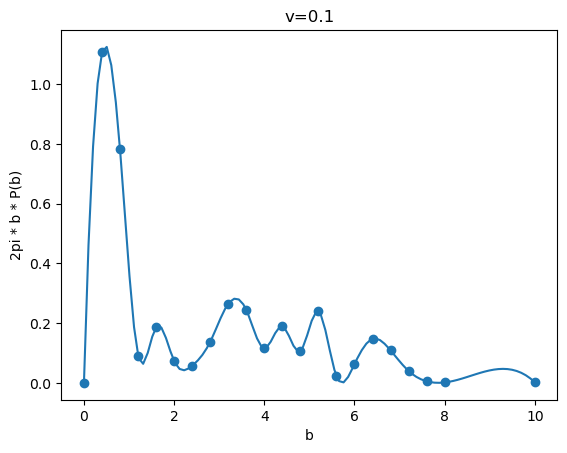

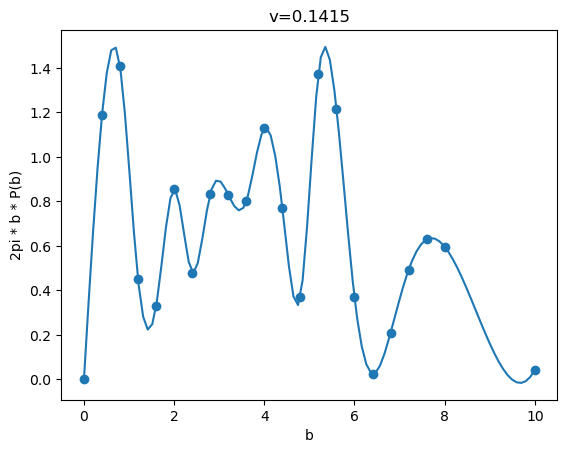

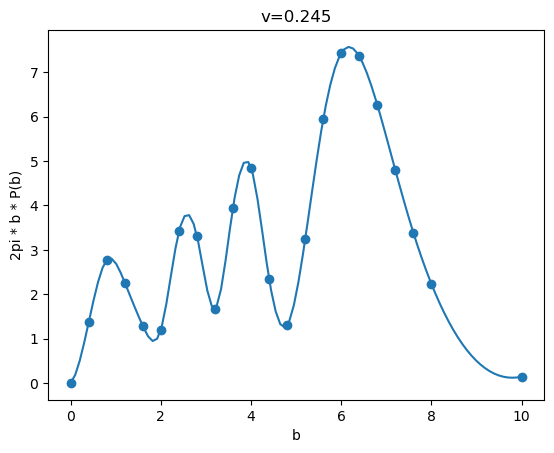

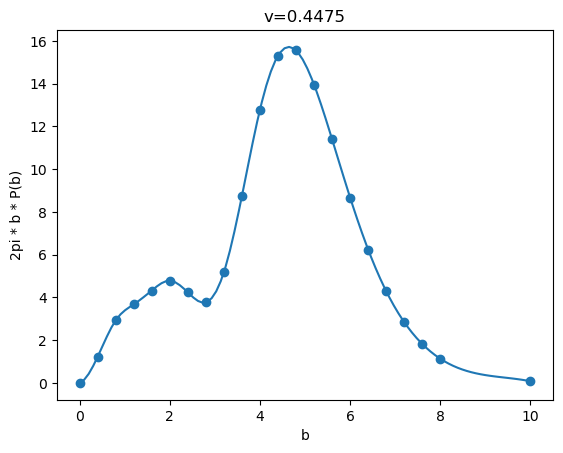

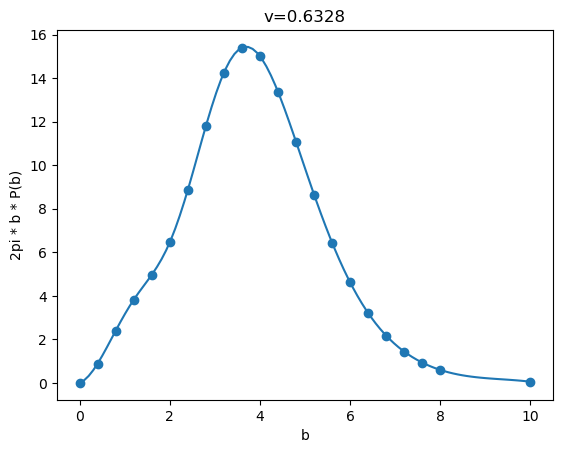

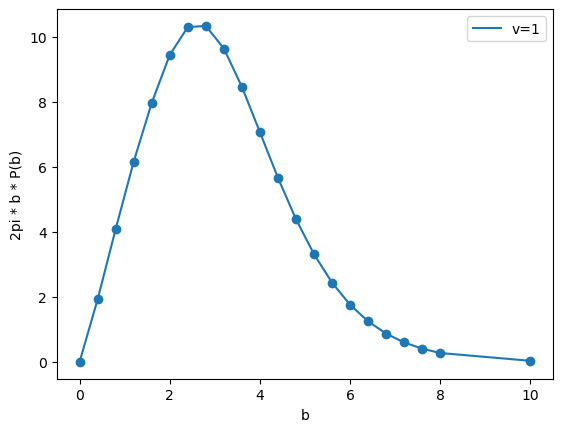

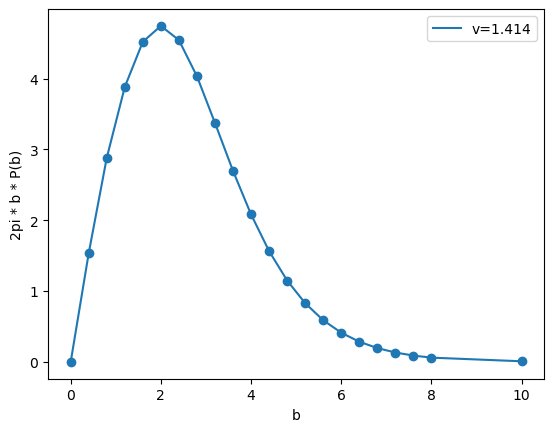

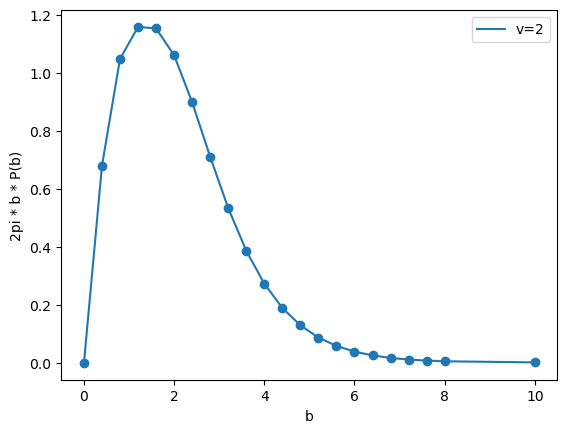

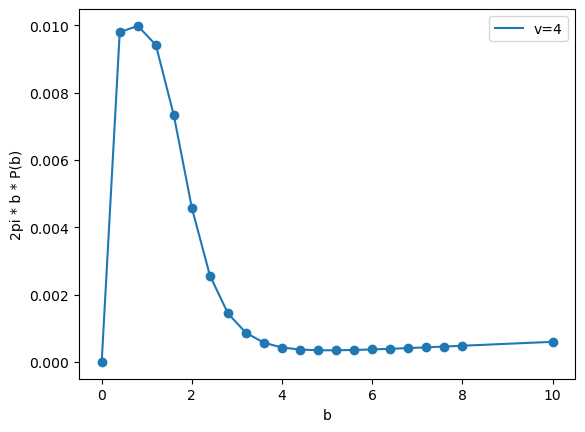

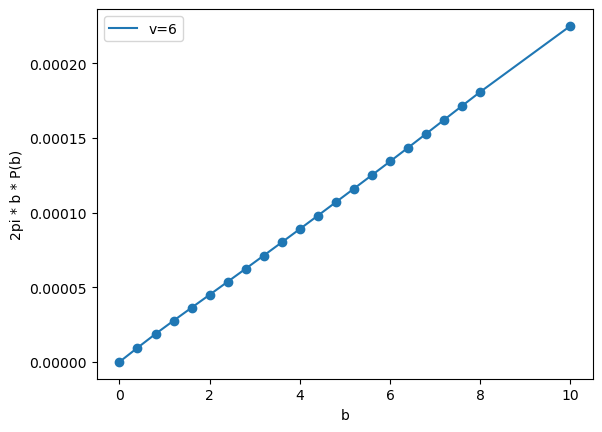

In [4]:
wfn_dict = gen_wfn_file()
cross_sections_dict = {}
b_set = set()

for v in wfn_dict:
    cross_sections_list = []
    for b in wfn_dict[v]:   
        x_vals, y_vals = wfn_dict[v][b]

        b_parts = b.split('=')
        b = float(b_parts[1])
        b_set.add(b)

        cross_section = 2 * np.pi * b * trapz(y_vals, x_vals)
        # check = trapz(y_vals, x_vals)
        # print(check, f'{v},{b}')
        cross_sections_list.append(cross_section)

        if b==0.4:
            cross_sections_list.insert(0,0)
    
    cross_sections_dict[v] = cross_sections_list

b_set.add(0)
bs = sorted(b_set)

for key in cross_sections_dict:
    v_parts = key.split('=')
    v = float(v_parts[1])

    if v < 1:
        f = interp1d(bs, cross_sections_dict[key], kind='cubic')
        x_new = np.linspace(0, 10, 100)
        y_new = f(x_new)
        plt.scatter(bs, cross_sections_dict[key])
        plt.plot(x_new, y_new)
        plt.xlabel('b')
        plt.ylabel('2pi * b * P(b)')
        plt.title(f'{key}')
        plt.show()
    else:
        plt.plot(bs, cross_sections_dict[key], label=f'{key}')
        plt.scatter(bs, cross_sections_dict[key])
        plt.xlabel('b')
        plt.ylabel('2pi * b * P(b)')
        plt.legend()
        plt.show()

    # plt.plot(bs, cross_sections_dict[key], label=f'{key}')
    # plt.scatter(bs, cross_sections_dict[key])
    # plt.xlabel('b')
    # plt.ylabel('2pi * b * P(b)')
    # plt.legend()
    # plt.show()





In [5]:
# experimental data that needs to be fixed because it's not correct 

# exp_energy = [0.125, 0.177, 0.250, 0.354, 0.5, 0.707, 1.0, 1.414, 2.0] 
# exp_xsec = [0.169, 0.185, 0.246, 0.336, 0.510, 0.770, 1.08, 1.58, 2.24] * np.array(1e-17) 
# exp_error = []



[2.49696000e-01 4.99947574e-01 1.49880024e+00 5.00031846e+00
 9.99872275e+00 2.49696000e+01 4.99241184e+01 9.98784000e+01
 3.99513600e+02 8.98905600e+02]
[4.47105947e-17 1.75306811e-16 8.41971454e-16 1.51538279e-15
 1.54165335e-15 1.08599496e-15 4.45208677e-16 9.51094891e-17
 5.97726112e-19 3.14743597e-20]


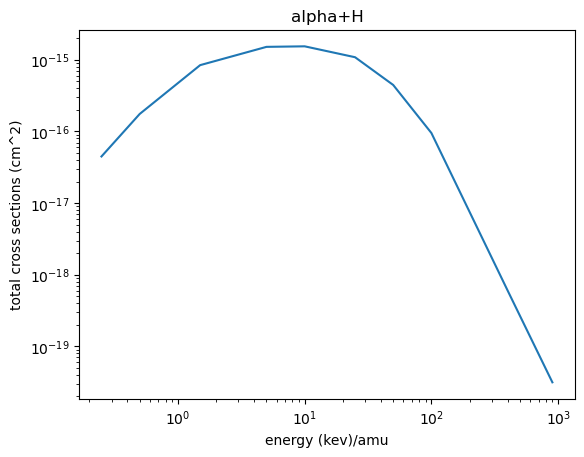

In [6]:
bohr_rad = 2.8E-17 # cm^2 
proj_mass = 1836 # au 
IP_H = 13.6 # eV

total_cross_sections = []
vs = []

for v, cross_sections in cross_sections_dict.items():
    total_cross_section = trapz(cross_sections, bs)
    total_cross_sections.append(total_cross_section)
    v_parts = v.split('=')
    v = float(v_parts[1])
    vs.append(v)

energy = (np.array(vs)**2 * proj_mass * IP_H) / 1E3
print(energy)
print(total_cross_sections * np.array(bohr_rad))

plt.plot(energy, total_cross_sections * np.array(bohr_rad))
# plt.scatter(exp_energy, exp_xsec, color = 'red')
plt.xlabel('energy (kev)/amu')
plt.ylabel('total cross sections (cm^2)')
plt.title('alpha+H')
plt.xscale('log')
plt.yscale('log')
plt.show()

    

In [7]:
alpha = [4.47105947e-17, 1.75306811e-16, 8.41971454e-16, 1.51538279e-15,
 1.54165335e-15, 1.08599496e-15, 4.45208677e-16, 9.51094891e-17,
 5.97726112e-19, 3.14743597e-20]

li = [1.19197731e-16, 2.02710631e-16, 5.67184024e-16, 1.52879751e-15,
 1.97791697e-15, 1.63037488e-15, 7.76349255e-16, 1.95745356e-16,
 1.53747022e-18, 3.07269997e-20]

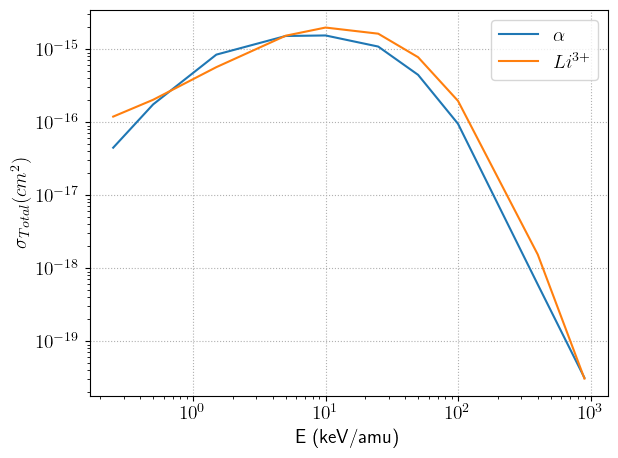

In [8]:
plt.rcParams['text.usetex'] = True # TeX rendering
plt.rcParams.update({'font.size': 14})


# plt.plot(energy, p, label = r'$p$')
plt.plot(energy, alpha, label = r'$\alpha$')
plt.plot(energy, li, label = r'$Li^{3+}$')
# plt.plot(energy, be, label = r'$Be^{4+}$')
plt.xlabel(r'E (keV/amu)')
plt.ylabel(r'$\sigma_{Total} (cm^2)$')
# plt.title('Ion collisions on H')
plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.tight_layout()
plt.grid(linestyle='dotted')
plt.show()